In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

from benchmarks import *

In [2]:
df = pd.read_csv("F-F_Research_Data_Factors_daily.CSV", skiprows=4, nrows=25710)
df['date'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.index = df.date
df_rf = df['RF'].astype(float) / 252

In [3]:
result_pickles = [
  ('SEC CNN', 'sec_cnn_results.pkl'),
  ('SEC RNN', 'sec_rnn_results.pkl'),
  ('SEC MLP', 'sec_mlp_results.pkl')
]

In [10]:
stats = {}
port_vals = {}

for (label, filename) in result_pickles:
  with open(filename, 'rb') as f:
    results = pkl.load(f)
    port_val = np.array(results['port_val'])
    port_vals[label] = port_val
    rf = df_rf[results['times_arr'][1:]]
    rets = port_val[1:] / port_val[:-1] - 1
  
  sharpe = sharpe_ratio(rets, rf=rf)
  sortino = sortino_ratio(rets, 0, rf=rf)
  drawdown = max_drawdown(rets)
  stats[label] = [sharpe, sortino, drawdown]

snp_val = np.array(results['snp_val'])
port_vals['S&P'] = snp_val
rets = snp_val[1:] / snp_val[:-1] - 1
sharpe = sharpe_ratio(rets)
sortino = sortino_ratio(rets, 0)
drawdown = max_drawdown(rets)
stats['S&P'] = [sharpe, sortino, drawdown]

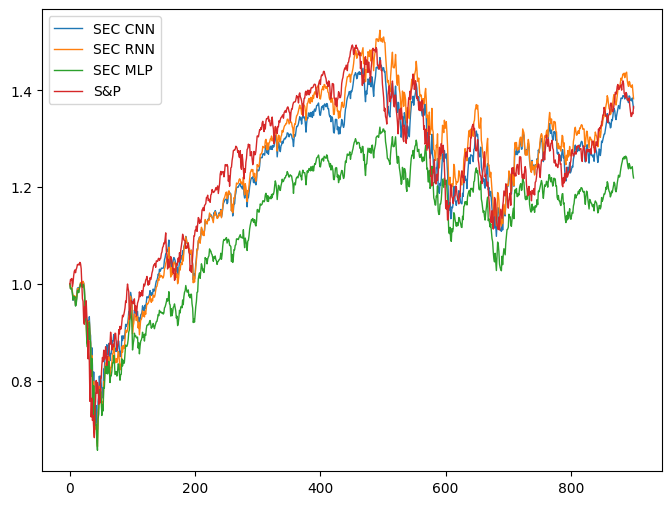

In [11]:
plt.figure(figsize=(8, 6))
for label, port_val in port_vals.items():
  plt.plot(port_val, label=label, lw=1)
plt.legend()
plt.show()

In [12]:
stats_df = pd.DataFrame(stats, index=["Sharpe Ratio", "Sortino Ratio", "Max Drawdown"])
stats_df

,SEC CNN,SEC RNN,SEC MLP,S&P
Sharpe Ratio,0.029996,0.029832,0.021003,0.030766
Sortino Ratio,-0.814816,-0.827444,-0.805943,-0.846954
Max Drawdown,0.302553,0.339562,0.343780,0.346682
